# DAT405 Assignment 3 – Group 53
Venkata Sai Dinesh Uddagiri - (24 hrs)
Madumitha Venkatesan - (24 hrs)
November 22, 2022

1. Show the distribution of phi and psi combinations using:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

a. A scatter plot

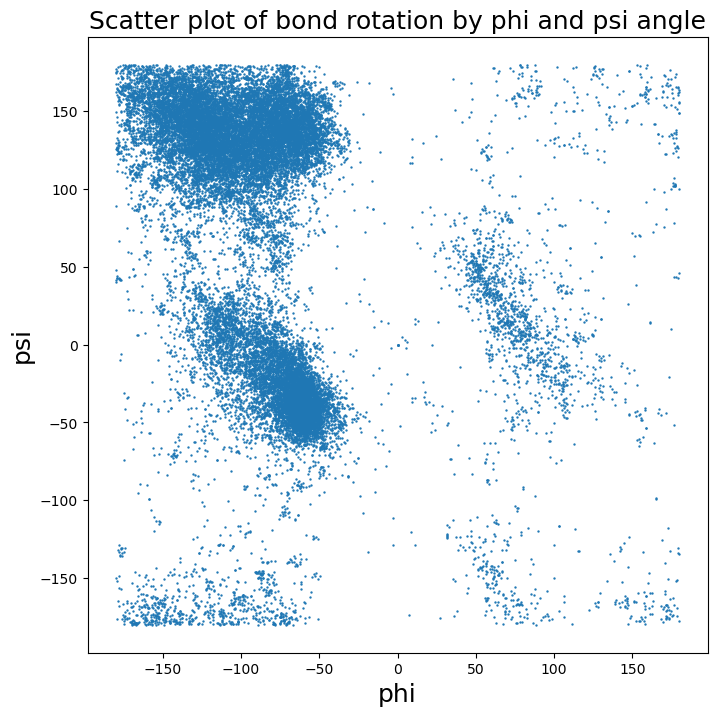

In [2]:
#Load the data to data frame
protein_chain_df_raw=pd.read_csv("assignment3-data-1.csv")
protein_angle_df=protein_chain_df_raw[['phi','psi']]
plt.figure(figsize=(8, 8))
#Plot a scatter plot (phi vs psi)
plt.scatter(protein_angle_df['phi'],protein_angle_df['psi'],s=0.5)
# Defining labels and title of plot
plt.xlabel('phi', fontsize=18)
plt.ylabel('psi', fontsize=18)
plt.title('Scatter plot of bond rotation by phi and psi angle', fontsize=18)
plt.show()

b. A heatmap

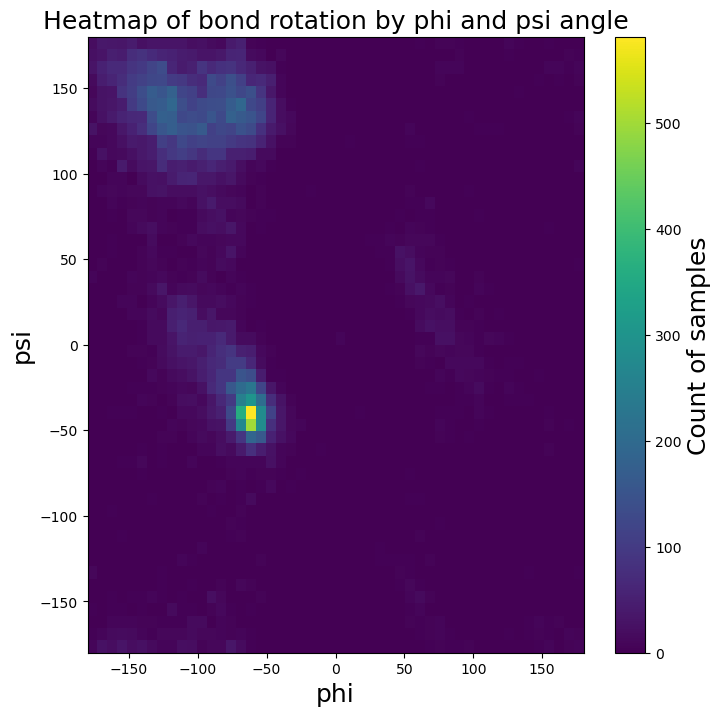

In [3]:
plt.figure(figsize=(8, 8))
#Plot a Heat map (phi vs psi)
plt.hist2d(protein_angle_df['phi'],protein_angle_df['psi'], bins=50)
# Plot a colorbar
plt.colorbar().set_label('Count of samples', fontsize=18)
# Defining labels and title of plot
plt.xlabel('phi', fontsize=18); 
plt.ylabel('psi', fontsize=18)
plt.title('Heatmap of bond rotation by phi and psi angle', fontsize=18)
plt.show()

2. Use the K-means clustering method to cluster the phi and psi angle combinations in the data file.

a. Experiment with different values of K. Suggest an appropriate value of K for this task and motivate this choice.

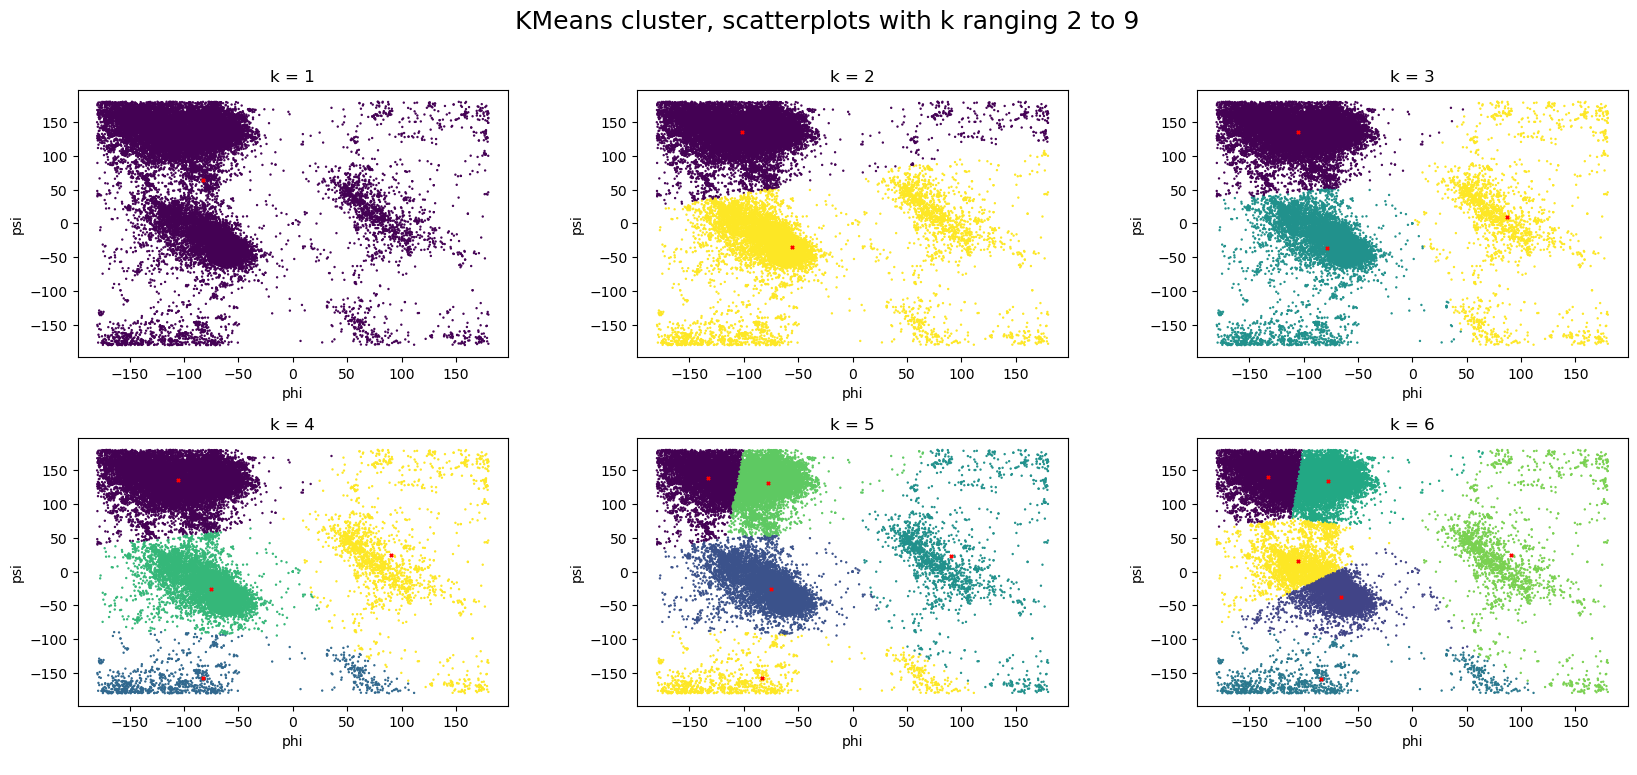

In [4]:
# Defining list of k values to find appropriate value of K
k_values=list(range(1, 7))
rows=2
coloumns=3
fig, ax = plt.subplots(rows,coloumns, figsize=(20, 8))
count=0
mean_values=[]
silhouette_scores=[]
for i in range(rows):
    for j in range(coloumns):
        k=k_values[count]
        count=count+1
        # Instance of Kmeans and fit the model
        km = KMeans(n_clusters=k, random_state=0).fit(protein_angle_df)
        pred = km.predict(protein_angle_df)
        # Append the kmean inertia to mean_values list, to plot elbow plot later
        mean_values.append(km.inertia_)
        # Scatter plot with kmeans clustring
        ax[i][j].scatter(x=protein_angle_df['phi'],y=protein_angle_df['psi'],c=pred,s=0.5)
        ax[i][j].scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='red', marker='x',s=5)
        # Defining labels and title for each subplot
        ax[i][j].set_xlabel('phi\n')
        ax[i][j].set_ylabel('psi')
        ax[i][j].set_title('k = '+str(k))
        # Append the silhouette_score to silhouette_scores list, to validate cluster later
        if(k!=1):
            score = silhouette_score(protein_angle_df, km.labels_, metric='euclidean')
            silhouette_scores.append(score)
# Defining space and title for plot
plt.subplots_adjust(wspace=0.3, hspace=0.3)
fig.suptitle('KMeans cluster, scatterplots with k ranging 2 to 9', fontsize=18)
plt.show()

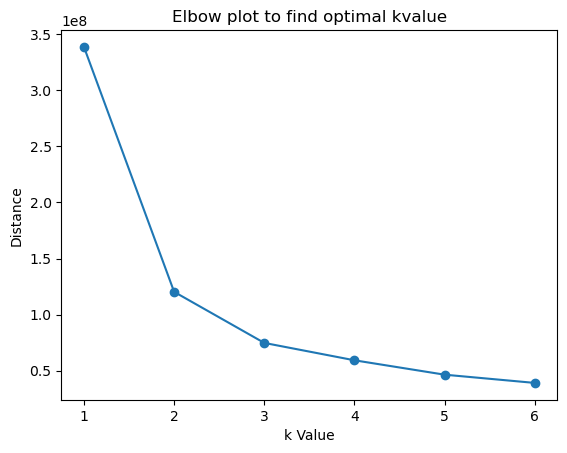

In [5]:
#Elbow plot to find Optimal k value
plt.plot(k_values, mean_values, marker='o')
# Defining labels and title of plot
plt.xlabel('k Value')
plt.ylabel('Distance')
plt.title('Elbow plot to find optimal kvalue')
plt.show()

b. Validate the clusters that are found with the chosen value of K. Hint: See the slides for Lecture 6, Section Validating clustering.

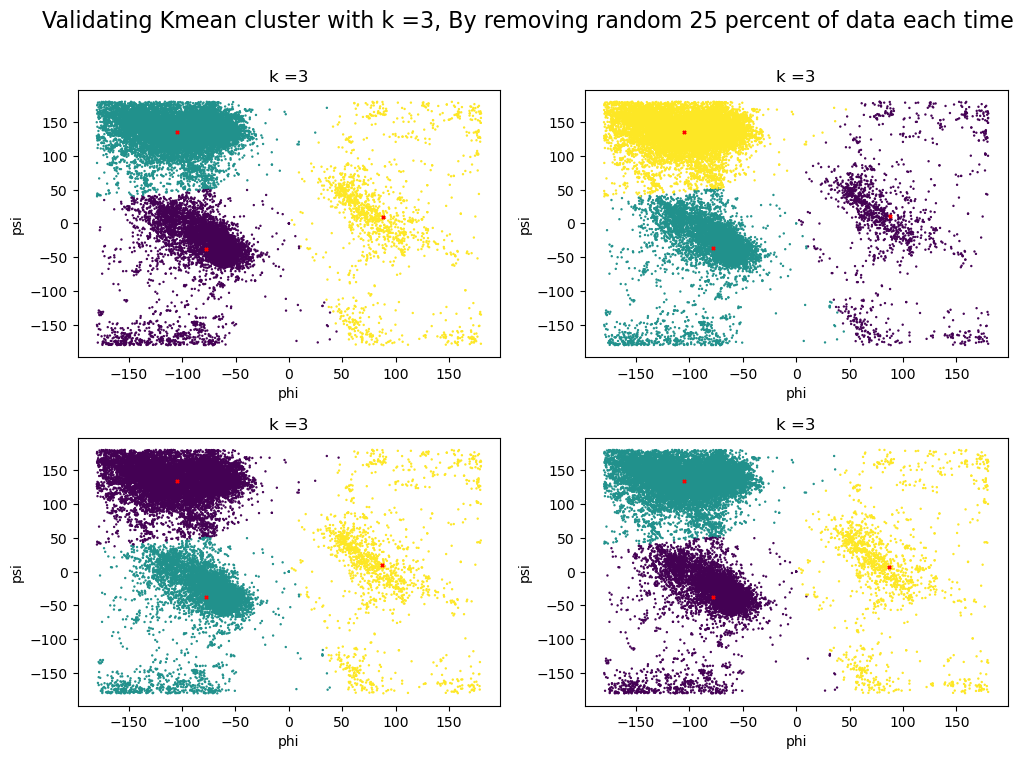

(22027, 2)

In [6]:
import math
fig, ax = plt.subplots(2,2, figsize=(12, 8))
for i in range(2):
    for j in range(2):
        #25 percent random indexes array of protein_angle_df
        random_data_drop = np.random.choice(protein_angle_df.index, math.floor(0.25 * protein_angle_df.shape[0]), replace=False)
        #Drop 25 percent indexes in random_data_drop array, from data frame
        protein_angle_df_subset = protein_angle_df.drop(random_data_drop)
         # Instance of Kmeans and fit the model with subset after droping 25%
        km = KMeans(n_clusters=3, random_state=0).fit(protein_angle_df_subset)
        pred = km.predict(protein_angle_df_subset)    
         # Scatter plot with kmeans clustring
        ax[i][j].scatter(x=protein_angle_df_subset['phi'],y=protein_angle_df_subset['psi'],c=pred,s=0.5)
        ax[i][j].scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='red', marker='x',s=5)
        # Defining labels and title for each subplot
        ax[i][j].set_xlabel('phi\n')
        ax[i][j].set_ylabel('psi')
        ax[i][j].set_title('k ='+str(3))
# Defining space and title for plot
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.suptitle('Validating Kmean cluster with k =3, By removing random 25 percent of data each time', fontsize=16)
plt.show()
protein_angle_df_subset.shape

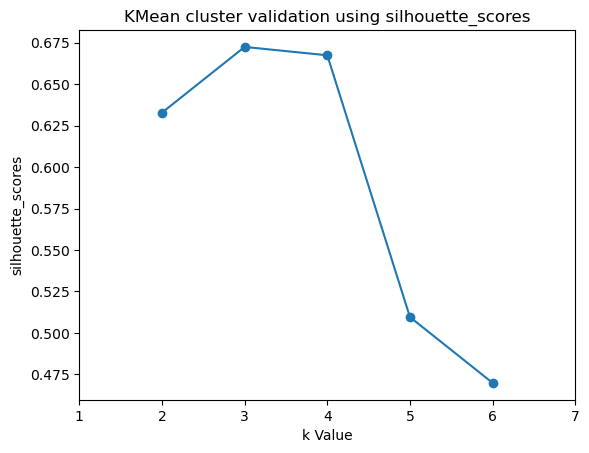

In [7]:
k_values=list(range(2, 7))
#silhouette_scores plot to Validate clusters
plt.plot(k_values, silhouette_scores, marker='o')
# Defining labels and title of plot
plt.xlabel('k Value')
plt.ylabel('silhouette_scores')
plt.xlim(1,7)
plt.title('KMean cluster validation using silhouette_scores')
plt.show()

d. Can you change the data to get better results (or the same results in a simpler way)? (Hint:since both phi and psi are 

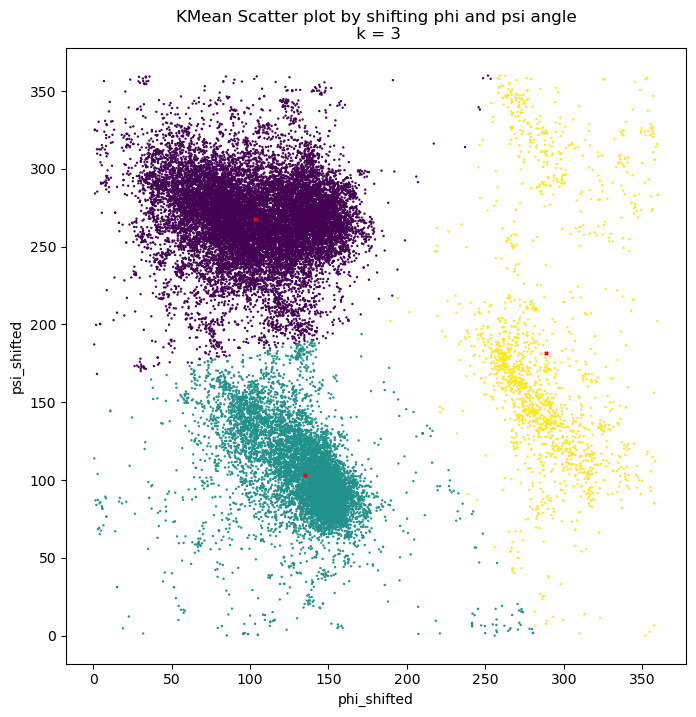

In [8]:
phi_shift=210
psi_shift=130
#Creating copy of original data frame, for shifting phi&psi angles without modifying original data frame
protein_angle_shift=protein_chain_df_raw.copy()
#shifting phi angle by 230 and performing modulo operation by 360
protein_angle_shift['phi']=(protein_angle_shift['phi']+phi_shift)%360
#shifting phi angle by 110 and performing modulo operation by 360
protein_angle_shift['psi']=(protein_angle_shift['psi']+psi_shift)%360
 # Instance of Kmeans and fit the model
km = KMeans(n_clusters=3, random_state=0).fit(protein_angle_shift[['phi','psi']])
pred = km.predict(protein_angle_shift[['phi','psi']])
plt.figure(figsize=(8, 8))
#Plot a Kmean scatter plot (phi vs psi) after shifting angles
plt.scatter(x=protein_angle_shift['phi'],y=protein_angle_shift['psi'],c=pred,s=0.5)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='red', marker='x',s=5)
# Defining labels and title of plot
plt.xlabel('phi_shifted')
plt.ylabel('psi_shifted')
plt.title('KMean Scatter plot by shifting phi and psi angle\n k = 3')
plt.show()

3. Use the DBSCAN method to cluster the phi and psi angle combinations in the data file.

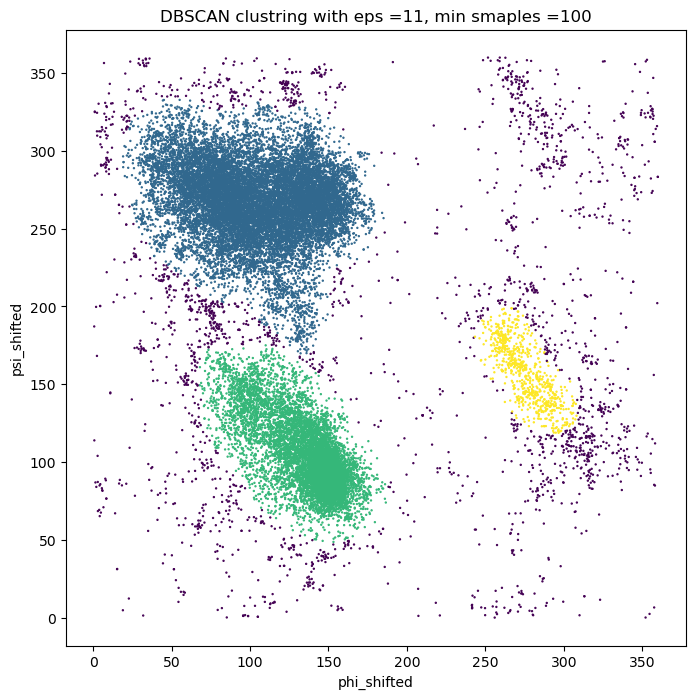

In [9]:
#Defining eps and min samples
eps = 11
min_samples = 100
# Instance of DBSCAN and fit the model
dbscan = DBSCAN(eps = eps, min_samples = min_samples)
pred = dbscan.fit_predict(protein_angle_shift[['phi', 'psi']])
plt.figure(figsize=(8, 8))
# Scatter plot with DBSCAN clustring
plt.scatter(protein_angle_shift['phi'], protein_angle_shift['psi'], c=pred, s=0.5)
# Defining labels and title of plot
plt.title('DBSCAN clustring with eps ='+str(eps)+', min smaples ='+ str(min_samples))
plt.xlabel('phi_shifted')
plt.ylabel('psi_shifted')
plt.show()

b. Highlight the clusters found using DBSCAN and any outliers in a scatter plot. How many outliers are found? Plot a bar  chart to show which amino acid residue types are most frequently outliers.

Total number of outlier are:  2275


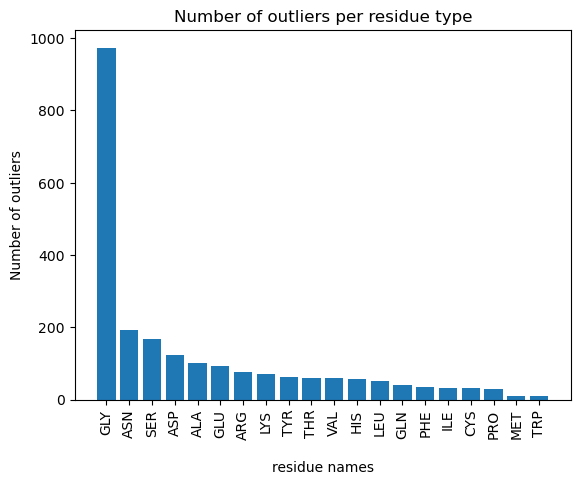

In [10]:
protein_angle_shift['label']=dbscan.labels_
#creating new outlier data frame
outlier_protein_df=protein_angle_shift[protein_angle_shift.label == -1].copy()
#count of outliers for each residual type
outlier=outlier_protein_df['residue name'].value_counts(sort=True)
# Bar plot to show which amino acid residue types are most frequently outliers
plt.bar(outlier.index,outlier.values)
print('Total number of outlier are: ',sum(outlier.values))
# Defining labels and title of plot
plt.title('Number of outliers per residue type')
plt.xlabel('\nresidue names')
plt.ylabel('Number of outliers')
plt.xticks(rotation ='vertical')
plt.show()

d. Discuss whether the clusters found using DBSCAN are robust to small changes in the minimum number of samples in the neighbourhood for a point to be considered as a core point, and/or the choice of the maximum distance between two samples belonging to the same neighbourhood (“eps” or “epsilon”).

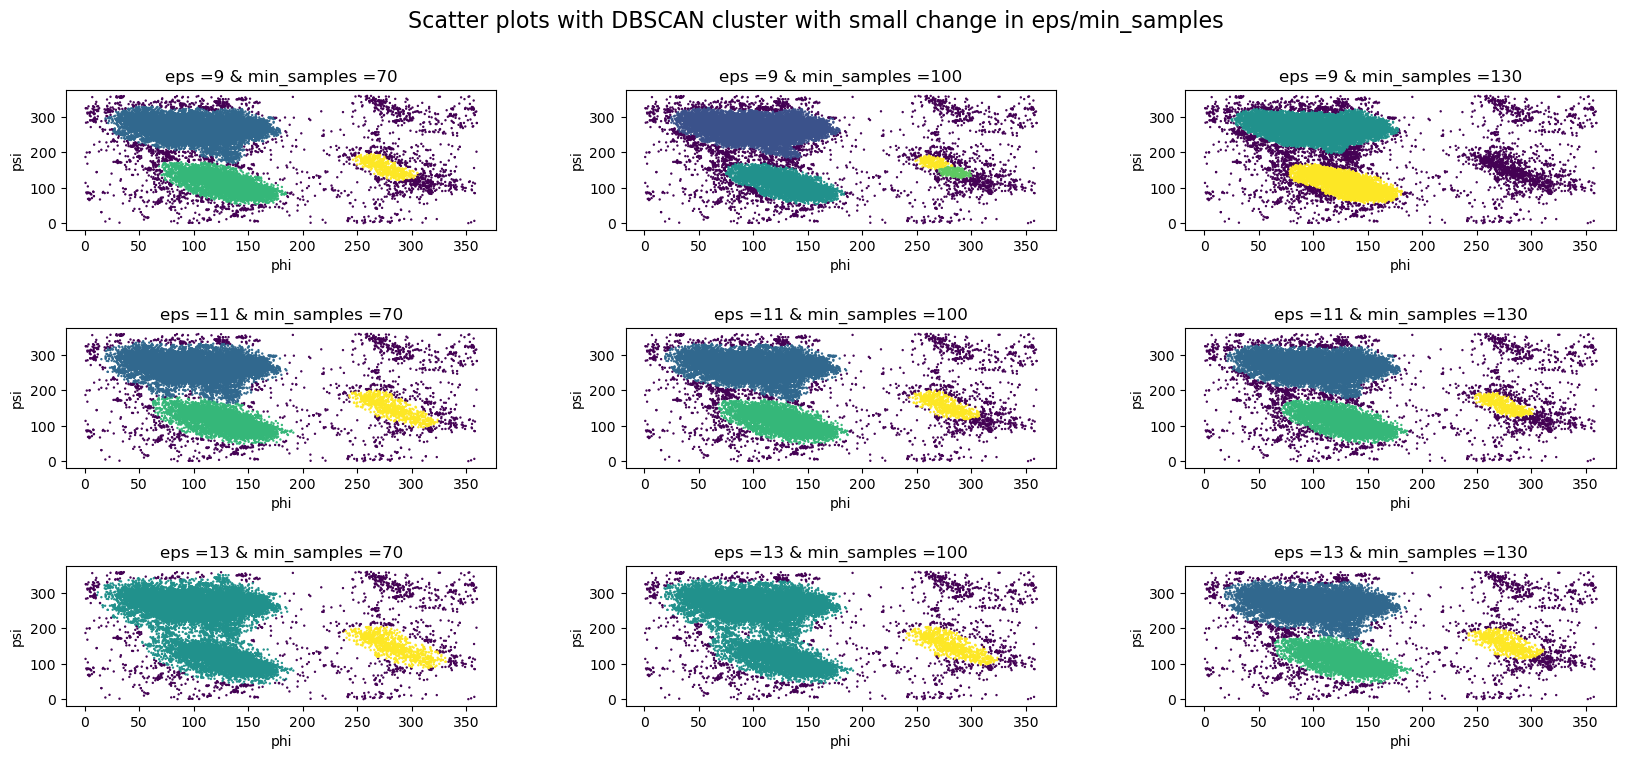

In [11]:
rows=3
coloumns=3
fig, ax = plt.subplots(rows,coloumns, figsize=(20, 8))
#Defining eps and min samples
eps_values=[9,11,13]
min_samples_values=[70,100,130]
for i in range(rows):
    eps=eps_values[i]
    for j in range(coloumns):
        min_samples=min_samples_values[j]
        # Instance of DBSCAN and fit the model
        db = DBSCAN(eps = eps, min_samples = min_samples)
        pred_dbscan = db.fit_predict(protein_angle_shift[['phi', 'psi']])
        # Scatter plot with DBSCAN clustring
        ax[i][j].scatter(x=protein_angle_shift['phi'],y=protein_angle_shift['psi'],c=pred_dbscan,s=0.5)
        # Defining labels and title for each subplot
        ax[i][j].set_xlabel('phi\n')
        ax[i][j].set_ylabel('psi')
        ax[i][j].set_title('eps ='+str(eps_values[i])+' & min_samples ='+str(min_samples_values[j]))
# Defining labels and title of plot
plt.subplots_adjust(wspace=0.3, hspace=0.7)
fig.suptitle('Scatter plots with DBSCAN cluster with small change in eps/min_samples', fontsize=16)
plt.show()

4. The data file can be stratified by amino acid residue type. 

a. Use DBSCAN to cluster the data that have residue type PRO. Investigate how the clusters found for amino acid residues of type PRO differ from the general clusters (i.e., the clusters that you get from DBSCAN with mixed residue types in question 3).

Number of noise points of PRO amino acid: 149


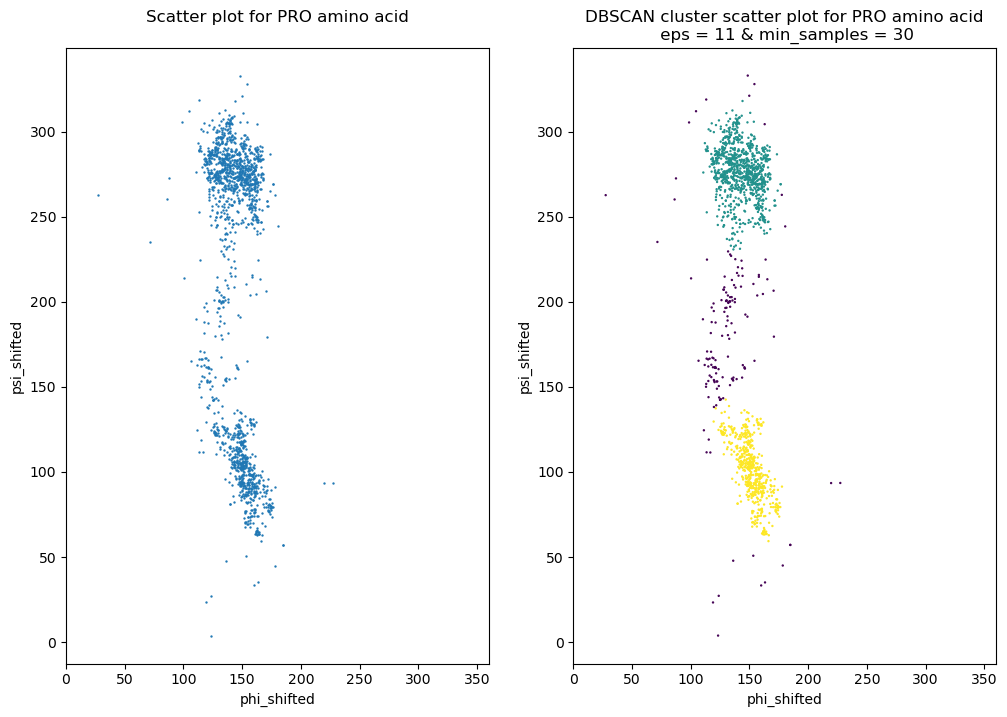

<Figure size 800x800 with 0 Axes>

In [12]:
#loading PRO amino acid data 
PRO_protein_data=protein_angle_shift[protein_angle_shift['residue name']=='PRO']
fig, ((ax1, ax2)) = plt.subplots(1, 2,figsize=(12,8))
#Scatter plot for PRO amino acid
ax1.scatter(PRO_protein_data['phi'], PRO_protein_data['psi'], s=0.5)
# Defining labels and title of ax1 subplot
ax1.set_title('Scatter plot for PRO amino acid\n')
ax1.set_xlabel('phi_shifted')
ax1.set_ylabel('psi_shifted')
ax1.set_xlim(0,360)
#Defining eps and min samples
eps = 11
min_samples = 30
# Instance of DBSCAN and fit the model for PRO amino acid
db = DBSCAN(eps = eps, min_samples = min_samples)
pred = db.fit_predict(PRO_protein_data[['phi', 'psi']])
plt.figure(figsize=(8, 8))
labels = db.labels_
n_noise_ = list(labels).count(-1)
print('Number of noise points of PRO amino acid: %d' % n_noise_)
# Scatter plot with DBSCAN cluster for PRO amino acid
ax2.scatter(PRO_protein_data['phi'], PRO_protein_data['psi'], c=pred, s=0.5)
# Defining labels and title of ax2 subplot
ax2.set_title('DBSCAN cluster scatter plot for PRO amino acid\n eps = '+str(eps)+' & min_samples = '+str(min_samples))
ax2.set_xlabel('phi_shifted')
ax2.set_ylabel('psi_shifted')
ax2.set_xlim(0,360)
plt.show()

b. Now use DBSCAN to cluster the data that have residue type GLY. Investigate 
how the clusters found for amino acid residues of type GLY differ from the 
general clusters. (1)

Number of noise points: 389


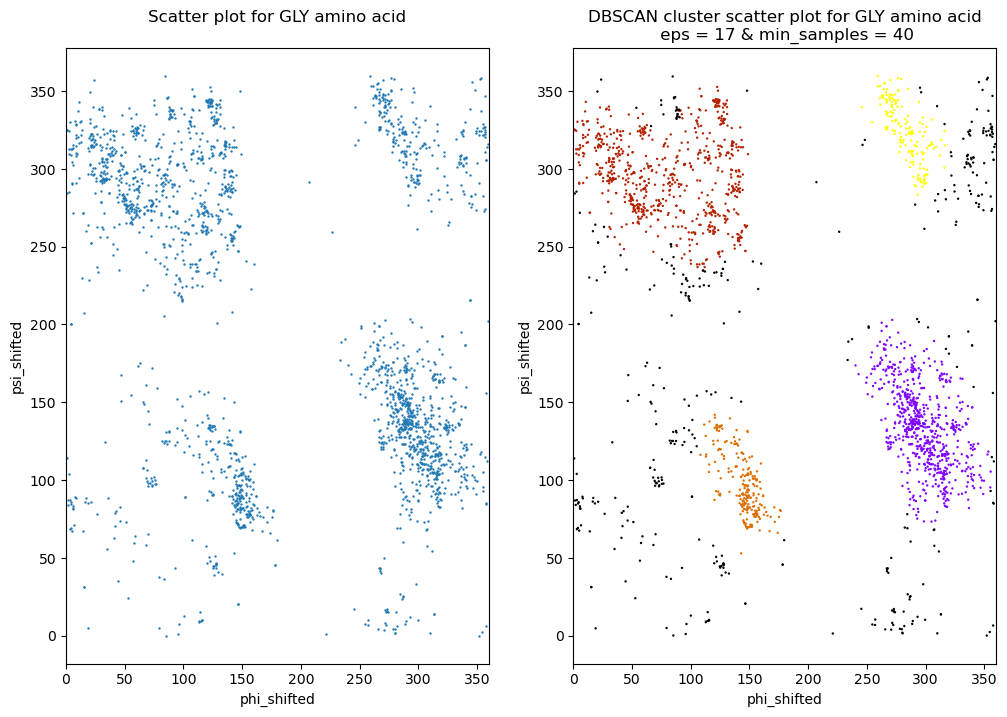

<Figure size 800x800 with 0 Axes>

In [13]:
#loading GLY amino acid data 
GLY_protein_data=protein_angle_shift[protein_angle_shift['residue name']=='GLY']
fig, ((ax1, ax2)) = plt.subplots(1, 2,figsize=(12,8))
#Scatter plot for GLY amino acid
ax1.scatter(GLY_protein_data['phi'], GLY_protein_data['psi'], s=0.5)
# Defining labels and title of ax1 subplot
ax1.set_title('Scatter plot for GLY amino acid\n')
ax1.set_xlabel('phi_shifted')
ax1.set_ylabel('psi_shifted')
ax1.set_xlim(0,360)
#Defining eps and min samples
eps = 17
min_samples = 40
# Instance of DBSCAN and fit the model for PRO amino acid
db = DBSCAN(eps = eps, min_samples = min_samples)
pred_dbscan = db.fit_predict(GLY_protein_data[['phi', 'psi']])
labels = db.labels_
n_noise_ = list(labels).count(-1)
print('Number of noise points: %d' % n_noise_)
plt.figure(figsize=(8, 8))
# DBSCAN cluster scatter plot for GLY amino acid
ax2.scatter(GLY_protein_data['phi'], GLY_protein_data['psi'], c=pred_dbscan, s=0.5, cmap='gnuplot')
# Defining labels and title of plot
ax2.set_title('DBSCAN cluster scatter plot for GLY amino acid\n eps = '+str(eps)+' & min_samples = '+str(min_samples))
ax2.set_xlabel('phi_shifted')
ax2.set_ylabel('psi_shifted')
ax2.set_xlim(0,360)
plt.show()